In [189]:
%run ./msgc_experiments_CMBBEIV_init.ipynb

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jirik\Miniconda3\envs\lisa\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes', 'table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [190]:
import pandas as pd
import seaborn as sns

# Data processing graphs, statistics

# Seaborn graphs

In [247]:
df = pd.read_csv(fnamenew)
df["image voxel number"] = df["data size"].pow(3)
df["relative object size"] = df["data object size px"] / df["image voxel number"]
df["log(relative object size)"] = log(df["data object size px"] / df["image voxel number"])
# df.rename(columns={"msgc time": "MSGC time"})
# dfs = df[(df["data seedsz"]==3) & (df["data offset"] == 3) & (df["data radius"] == 10) & (df["experiment"] == "image size")]
dfs = df[df["experiment"] == "image size"]
dfs_plus = dfs[dfs['data size'] > 160]

sns.set_context("paper")
sns.set_style("white")

In [192]:
df.keys()

Index(['_create_nlinks time', 'block size', 'data image size px',
       'data object size px', 'data offset', 'data radius', 'data seedsz',
       'data size', 'edge number', 'error', 'experiment',
       'experiment iteration start time', 'gc time', 'low level image voxels',
       'low level object voxels', 'machine hostname', 'method',
       'nlinks number', 't graph 01', 't graph 10', 't graph 11', 't graph 13',
       't graph 14', 't graph high', 't graph low', 't split 01', 't split 02',
       't split 03', 't split 04', 't split 05', 't split 06', 't split 07',
       't split 08', 't split 081', 't split 082', 't split 0821',
       't split 09', 't split 10', 't1', 't10', 't2', 't3', 't3.1', 't3.2',
       't3.3', 't4', 't5', 't6', 't7', 't8', 't9', 'time', 'tlinks number',
       'image voxel number', 'relative object size'],
      dtype='object')

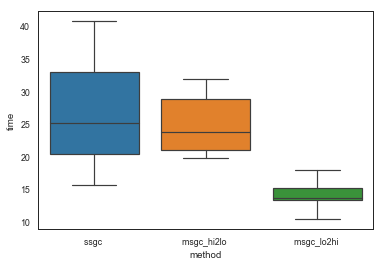

In [193]:
sns.boxplot(data=dfs_plus, y="time", x="method", showfliers=False)

In [194]:
# df

In [195]:

uu = pd.melt(dfs_plus.rename(columns={"gc time": "gc", "time": "total"}), value_vars=["gc", "total"], id_vars=["method"], var_name="time type", value_name="time")
# uu = pd.melt(dfs, value_vars=["gc time", "time"], id_vars=["method"], var_name="type", value_name="time")
# uu

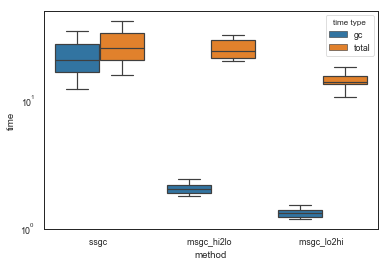

In [196]:
bp = sns.boxplot(data=uu, hue="time type",y="time", x="method", showfliers=False)
# bp.
bp.set(yscale="log")
# ax.set(xscale="log", yscale="log")
plt.savefig(op.join(latex_dir, "msgc_time_boxplot.pdf"), dpi=1000)

In [197]:
bp.set(yscale="log")

[None]

In [198]:
# sns.boxplot(data=dfs, y="error", x="method")

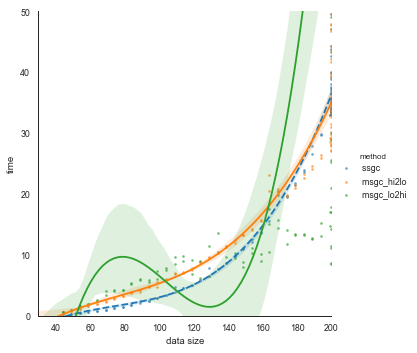

In [199]:
lm = sns.lmplot(data=df, x="data size", y="time", hue="method", order=3, scatter_kws={"s": 3, "marker": "x", "alpha": 0.5})
axes = lm.axes
axes[0,0].set_xlim(30,200)
axes[0,0].set_ylim(0,50)

lines = lm.ax.get_lines()
line = lines[0]
line.set_linestyle("--")
# line.set_marker("s")

plt.savefig(op.join(latex_dir, "msgc_time_datasize_plot.pdf"), dpi=1000)
# axes[0,1].set_ylim(0,)

# lm.ax.get_lines()


### Vykreslení dvou lmplotů do jednoho není tak snadné

In [200]:
# test better melt

dfm = pd.DataFrame({'City': ['Houston', 'Austin', 'Hoover'],
                   'State': ['Texas', 'Texas', 'Alabama'],
                   'Name':['Aria', 'Penelope', 'Niko'],
                   'Mango':[4, 10, 90],
                   'Orange': [10, 8, 14], 
                   'Watermelon':[40, 99, 43],
                   'Gin':[16, 200, 34],
                   'Vodka':[20, 33, 18]},
                 columns=['City', 'State', 'Name', 'Mango', 'Orange', 'Watermelon', 'Gin', 'Vodka'])
melt(dfm, id_vars=['City', 'State'], value_vars=[['Mango', 'Orange', 'Watermelon'], ['Gin', 'Vodka']], 
     var_name=['Fruit', 'Drink'], value_name=['Pounds', 'Ounces'])

,City,State,Fruit,Pounds,Drink,Ounces
0,Houston,Texas,Mango,4,Gin,16.0
1,Austin,Texas,Mango,10,Gin,200.0
2,Hoover,Alabama,Mango,90,Gin,34.0
3,Houston,Texas,Orange,10,Vodka,20.0
4,Austin,Texas,Orange,8,Vodka,33.0
5,Hoover,Alabama,Orange,14,Vodka,18.0
6,Houston,Texas,Watermelon,40,nan,NaN
7,Austin,Texas,Watermelon,99,nan,NaN
8,Hoover,Alabama,Watermelon,43,nan,NaN


In [201]:
# df.keys()

In [202]:
# df.rename(columns={"gc time": "gc", "time": "total"})[["gc", "total", "data size"]]

In [203]:
# df.rename(columns={"gc time": "gc", "time": "total"})

In [221]:
dfs = df[df["experiment"] == "image size"]
uu = melt(dfs.rename(columns={"gc time": "gc", "time": "total"}), value_vars=["gc", "total"], id_vars=["method", "data size", "image voxel number", "relative object size"], var_name=["time type"], value_name=["Time [s]"])
uu["mth"] = uu["method"] + " " + uu["time type"]
# uu

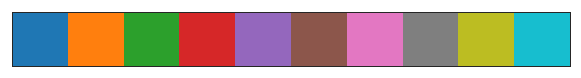

In [205]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

## Artifical data - constant object size

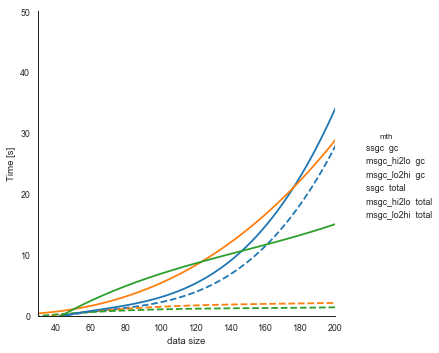

In [222]:
white_palette = [(1., 1., 1., 0.5)]
lm = sns.lmplot(data=uu, x="data size", y="Time [s]", hue="mth", order=3, 
                scatter_kws={"s": 3, "marker": "x", "alpha": 0.5}, 
#                 line_kws={"alpha": 1},
#                 palette=current_palette[:3]
                palette=white_palette
               )
axes = lm.axes
axes[0,0].set_xlim(30,200)
axes[0,0].set_ylim(0,50)

current_palette = sns.color_palette()
nlines = 3
n = 0
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
# line1.set_color(line2.get_color())

n = 1
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
# line1.set_color(line2.get_color())

n = 2
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
# line1.set_color(line2.get_color())

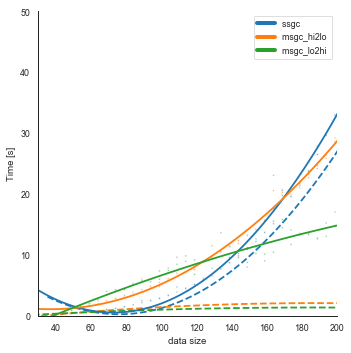

In [224]:

white_palette = [(1., 1., 1., 0.5)]
lm = sns.lmplot(
#     data=uu[uu["time type"] == "total"], 
    data=uu, 
    x="data size", y="Time [s]", hue="mth", order=2, 
                scatter_kws={"s": 3, "marker": "x", "alpha": 0.5}, 
#                 line_kws={"alpha": 1},
#                 palette=current_palette[:3],
                palette=white_palette,
                legend=None,
#     legend="off"
               )
axes = lm.axes
axes[0,0].set_xlim(30,200)
axes[0,0].set_ylim(0,50)

current_palette = sns.color_palette()
nlines = 3
n = 0
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
# line1.set_color(line2.get_color())

n = 1
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
# line1.set_color(line2.get_color())

n = 2
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
line1.set_color(line2.get_color())


# body
sc = sns.scatterplot(data=uu[uu["time type"] == "total"], x="data size", y="Time [s]", hue="mth", ax=lm.ax, alpha=0.8, s=3)
texts = lm.ax.legend_.get_texts()
leglines = lm.ax.legend_.get_lines()

# texts[0].set_text("short")
# texts.pop(0)
# texts.pop(0)

# plt.legend(lm.ax.legend_[3:6])

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=current_palette[0], lw=4),
                Line2D([0], [0], color=current_palette[1], lw=4),
                Line2D([0], [0], color=current_palette[2], lw=4)]
lm.ax.legend(
    custom_lines, 
    [tx.get_text()[:-3] for tx in texts[:3]],
#     ['Cold', 'Medium', 'Hot'],
)
# lg = lm.ax.legend()

In [159]:
texts[0].get_text()

'ssgc  gc'

In [160]:
# dir(lm.ax.legend_)

In [161]:


# L=plt.legend()
lm.ax.legend_.get_texts()
# L.get_texts()[0].set_text('make it short')

<a list of 3 Text objects>

### With voxel number

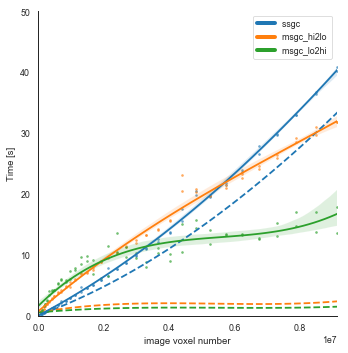

In [227]:
rename_time = {
    "time": "Time [s]"
}
# uu = 
current_palette = sns.color_palette()
white_palette = [
    (1., 1., 1., 0.5),
    (1., 1., 1., 0.5),
    (1., 1., 1., 0.5),
    current_palette[0],
    current_palette[1],
    current_palette[2],
]
lm = sns.lmplot(
#     data=uu[uu["time type"] == "total"], 
    data=uu, 
    x="image voxel number", y="Time [s]", hue="mth", order=3, 
                scatter_kws={"s": 3, "marker": "x", "alpha": 0.5}, 
#                 line_kws={"alpha": 1},
#                 palette=current_palette[:3],
                palette=white_palette,
                legend=None,
#     legend="off"
               )
axes = lm.axes
axes[0,0].set_xlim(30,uu["image voxel number"].max())
axes[0,0].set_ylim(0,50)

current_palette = sns.color_palette()
nlines = 3
n = 0
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
# line1.set_color(line2.get_color())

n = 1
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
# line1.set_color(line2.get_color())

n = 2
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
line1.set_color(line2.get_color())


# body
# sc = sns.scatterplot(
#     data=uu[uu["time type"] == "total"], x="image voxel number", y="time", hue="mth", 
#     ax=lm.ax, alpha=1.0, s=5
# )
# texts = lm.ax.legend_.get_texts()
# leglines = lm.ax.legend_.get_lines()


# plt.legend(lm.ax.legend_[3:6])

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=current_palette[0], lw=4),
                Line2D([0], [0], color=current_palette[1], lw=4),
                Line2D([0], [0], color=current_palette[2], lw=4)]
# lm.ax.legend(
#     custom_lines, 
#     [tx.get_text()[:-3] for tx in texts[:3]],
# )
# lg = lm.ax.legend()
lm.ax.legend(
    custom_lines, 
    labels
#     [tx.get_text()[:-3] for tx in texts[:3]],
)

In [228]:
uu

,method,data size,image voxel number,relative object size,time type,Time [s],mth
0,ssgc,44,85184,0.093727,gc,0.194480,ssgc gc
1,msgc_hi2lo,44,85184,0.093727,gc,0.213427,msgc_hi2lo gc
2,msgc_lo2hi,44,85184,0.093727,gc,0.269278,msgc_lo2hi gc
3,ssgc,44,85184,0.093727,gc,0.194480,ssgc gc
4,msgc_hi2lo,44,85184,0.093727,gc,0.221408,msgc_hi2lo gc
5,msgc_lo2hi,44,85184,0.093727,gc,0.257281,msgc_lo2hi gc
6,ssgc,49,117649,0.069376,gc,0.256315,ssgc gc
7,msgc_hi2lo,49,117649,0.069376,gc,0.301195,msgc_hi2lo gc
8,msgc_lo2hi,49,117649,0.069376,gc,0.303154,msgc_lo2hi gc
9,ssgc,49,117649,0.069376,gc,0.269243,ssgc gc


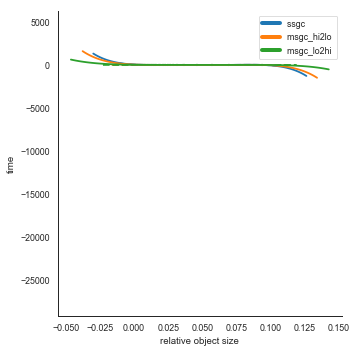

In [163]:
xx = "relative object size"
white_palette = [(1., 1., 1., 0.5)]
lm = sns.lmplot(
#     data=uu[uu["time type"] == "total"], 
    data=uu, 
    x=xx, y="time", hue="mth", 
    order=5, 
                scatter_kws={"s": 3, "marker": "x", "alpha": 0.5}, 
#                 line_kws={"alpha": 1},
#                 palette=current_palette[:3],
                palette=white_palette,
                legend=None,
#                 logx=True
#     legend="off"
               )
axes = lm.axes
# axes[0,0].set_xlim(30,uu[xx].max())
# axes[0,0].set_ylim(0,50)
# lm.set(
#     xscale="log",
# #     yscale="log"
# )

current_palette = sns.color_palette()
nlines = 3
n = 0
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
# line1.set_color(line2.get_color())

n = 1
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
# line1.set_color(line2.get_color())

n = 2
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
line1.set_color(line2.get_color())


# body
sc = sns.scatterplot(
    data=uu[uu["time type"] == "total"], x=xx, y="time", hue="mth", 
    ax=lm.ax, alpha=1.0, s=5
)
texts = lm.ax.legend_.get_texts()
leglines = lm.ax.legend_.get_lines()

# texts[0].set_text("short")
# texts.pop(0)
# texts.pop(0)

# plt.legend(lm.ax.legend_[3:6])

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=current_palette[0], lw=4),
                Line2D([0], [0], color=current_palette[1], lw=4),
                Line2D([0], [0], color=current_palette[2], lw=4)]
lm.ax.legend(
    custom_lines, 
    [tx.get_text()[:-3] for tx in texts[:3]],
#     ['Cold', 'Medium', 'Hot'],
)
# lg = lm.ax.legend()

[None]

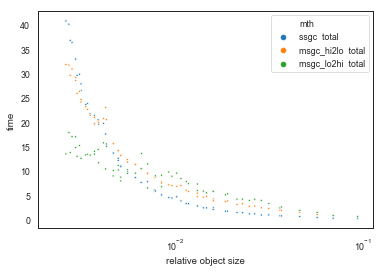

In [164]:
sc = sns.scatterplot(
    data=uu[uu["time type"] == "total"], x=xx, y="time", hue="mth", 
#     ax=lm.ax,
    alpha=1.0, s=5
)
sc.set(xscale="log",
#       yscale="log"
      )
# grid.set(xscale="log", )

In [165]:
lm.ax

In [166]:
dir(lm.ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_m

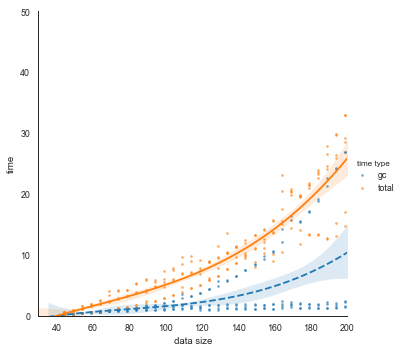

In [167]:
lm = sns.lmplot(data=uu, x="data size", y="time", hue="time type", order=3, scatter_kws={"s": 3, "marker": "x", "alpha": 0.5})
axes = lm.axes
axes[0,0].set_xlim(30,200)
axes[0,0].set_ylim(0,50)

lines = lm.ax.get_lines()
line = lines[0]
line.set_linestyle("--")
# line.set_marker("s")

plt.savefig(op.join(latex_dir, "msgc_time_datasize_plot.pdf"), dpi=1000)
# axes[0,1].set_ylim(0,)

# lm.ax.get_lines()


In [168]:
# this work jus for not duplicit values of data siz
# sns.tsplot(data=df, time="data size", value="time", unit="method", condition="method")
# plt.savefig(op.join(latex_dir, "msgc_size_time.pdf"), dpi=1000)

In [169]:
line.set_marker("s")

In [170]:
# df

In [171]:
# df["method"]

## Experiment 2: fixed image size

In [276]:
# uu = df[df["experiment"]=="object size"]

In [277]:
dfs = df[df["experiment"] == "object size"]
uu = melt(dfs.rename(columns={"gc time": "gc", "time": "total"}), value_vars=["gc", "total"], id_vars=["method", "data size", "image voxel number", "data object size px", "relative object size", "log(relative object size)"], var_name=["time type"], value_name=["Time [s]"])
uu["mth"] = uu["method"] + " " + uu["time type"]
# uu

In [278]:
dfs.keys()

Index(['_create_nlinks time', 'block size', 'data image size px',
       'data object size px', 'data offset', 'data radius', 'data seedsz',
       'data size', 'edge number', 'error', 'experiment',
       'experiment iteration start time', 'gc time', 'low level image voxels',
       'low level object voxels', 'machine hostname', 'method',
       'nlinks number', 't graph 01', 't graph 10', 't graph 11', 't graph 13',
       't graph 14', 't graph high', 't graph low', 't split 01', 't split 02',
       't split 03', 't split 04', 't split 05', 't split 06', 't split 07',
       't split 08', 't split 081', 't split 082', 't split 0821',
       't split 09', 't split 10', 't1', 't10', 't2', 't3', 't3.1', 't3.2',
       't3.3', 't4', 't5', 't6', 't7', 't8', 't9', 'time', 'tlinks number',
       'image voxel number', 'relative object size',
       'log(relative object size)'],
      dtype='object')

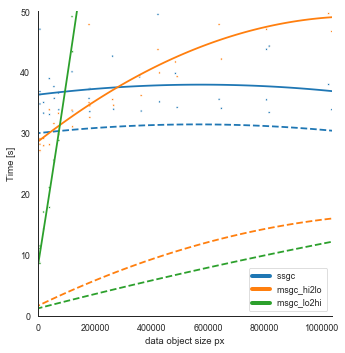

In [279]:

white_palette = [(1., 1., 1., 0.5)]
lm = sns.lmplot(
#     data=uu[uu["time type"] == "total"], 
    data=uu, 
#     x="image voxel number", 
    x="data object size px",
    y="Time [s]", hue="mth", order=2, 
                scatter_kws={"s": 3, "marker": "x", "alpha": 0.5}, 
#                 line_kws={"alpha": 1},
#                 palette=current_palette[:3],
                palette=white_palette,
                legend=None,
#     legend="off"
               )
axes = lm.axes
axes[0,0].set_xlim(30,uu["data object size px"].max())
axes[0,0].set_ylim(0,50)

current_palette = sns.color_palette()
nlines = 3
n = 0
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
# line1.set_color(line2.get_color())

n = 1
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
# line1.set_color(line2.get_color())

n = 2
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
line1.set_color(line2.get_color())


# body
sc = sns.scatterplot(
    data=uu[uu["time type"] == "total"], x="data object size px", y="Time [s]", hue="mth", 
    ax=lm.ax, alpha=1.0, s=5
)
texts = lm.ax.legend_.get_texts()
leglines = lm.ax.legend_.get_lines()

# texts[0].set_text("short")
# texts.pop(0)
# texts.pop(0)

# plt.legend(lm.ax.legend_[3:6])

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=current_palette[0], lw=4),
                Line2D([0], [0], color=current_palette[1], lw=4),
                Line2D([0], [0], color=current_palette[2], lw=4)]
lm.ax.legend(
    custom_lines, 
    [tx.get_text()[:-3] for tx in texts[:3]],
#     ['Cold', 'Medium', 'Hot'],
)
# lg = lm.ax.legend()
plt.savefig(op.join(latex_dir, "msgc_time_datasize_plot.pdf"), dpi=1000)

In [280]:
uu

,method,data size,image voxel number,data object size px,relative object size,log(relative object size),time type,Time [s],mth
0,ssgc,200,8000000,5654,0.000707,-7.254834,gc,28.538692,ssgc gc
1,msgc_hi2lo,200,8000000,5654,0.000707,-7.254834,gc,1.506011,msgc_hi2lo gc
2,msgc_lo2hi,200,8000000,5654,0.000707,-7.254834,gc,1.063156,msgc_lo2hi gc
3,ssgc,200,8000000,18962,0.002370,-6.044760,gc,27.174341,ssgc gc
4,msgc_hi2lo,200,8000000,18962,0.002370,-6.044760,gc,2.105370,msgc_hi2lo gc
5,msgc_lo2hi,200,8000000,18962,0.002370,-6.044760,gc,1.318475,msgc_lo2hi gc
6,ssgc,200,8000000,39248,0.004906,-5.317296,gc,26.972847,ssgc gc
7,msgc_hi2lo,200,8000000,39248,0.004906,-5.317296,gc,2.251008,msgc_hi2lo gc
8,msgc_lo2hi,200,8000000,39248,0.004906,-5.317296,gc,1.538916,msgc_lo2hi gc
9,ssgc,200,8000000,72397,0.009050,-4.705032,gc,27.713899,ssgc gc


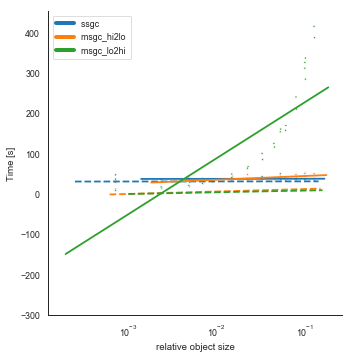

In [281]:
xx = "relative object size"
white_palette = [(1., 1., 1., 0.5)]
lm = sns.lmplot(
#     data=uu[uu["time type"] == "total"], 
    data=uu, 
#     x="image voxel number", 
    x=xx,
    y="Time [s]", hue="mth", 
#     order=1, 
                scatter_kws={"s": 3, "marker": "x", "alpha": 0.5}, 
#                 line_kws={"alpha": 1},
#                 palette=current_palette[:3],
                palette=white_palette,
                legend=None,
    logx=True,
#     logy=True
#     legend="off"
               )
axes = lm.axes
# axes[0,0].set_xlim(30,uu[xx].max())
# axes[0,0].set_ylim(0,50)
# yscale="log"

lm.set(
    xscale="log",
# #     yscale="log"
)

current_palette = sns.color_palette()
nlines = 3
n = 0
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
# line1.set_color(line2.get_color())

n = 1
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
# line1.set_color(line2.get_color())

n = 2
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
line1.set_color(line2.get_color())


# body
sc = sns.scatterplot(
    data=uu[uu["time type"] == "total"], x=xx, y="Time [s]", hue="mth", 
    ax=lm.ax, alpha=1.0, s=5
)
texts = lm.ax.legend_.get_texts()
leglines = lm.ax.legend_.get_lines()

# texts[0].set_text("short")
# texts.pop(0)
# texts.pop(0)

# plt.legend(lm.ax.legend_[3:6])

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=current_palette[0], lw=4),
                Line2D([0], [0], color=current_palette[1], lw=4),
                Line2D([0], [0], color=current_palette[2], lw=4)]
lm.ax.legend(
    custom_lines, 
    [tx.get_text()[:-3] for tx in texts[:3]],
#     ['Cold', 'Medium', 'Hot'],
)
# lg = lm.ax.legend()
plt.savefig(op.join(latex_dir, "msgc_time_datasize_plot.pdf"), dpi=1000)

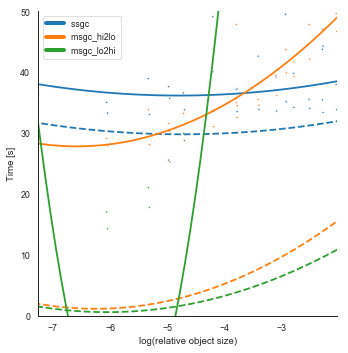

In [282]:
xx = "log(relative object size)"
white_palette = [(1., 1., 1., 0.5)]
lm = sns.lmplot(
#     data=uu[uu["time type"] == "total"], 
    data=uu, 
#     x="image voxel number", 
    x=xx,
    y="Time [s]", hue="mth", order=2, 
                scatter_kws={"s": 3, "marker": "x", "alpha": 0.5}, 
#                 line_kws={"alpha": 1},
#                 palette=current_palette[:3],
                palette=white_palette,
                legend=None,
#     legend="off"
               )
axes = lm.axes
axes[0,0].set_xlim(uu[xx].min(),uu[xx].max())
axes[0,0].set_ylim(0,50)

current_palette = sns.color_palette()
nlines = 3
n = 0
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
# line1.set_color(line2.get_color())

n = 1
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
# line1.set_color(line2.get_color())

n = 2
lines = lm.ax.get_lines()
line1 = lines[n]
line2 = lines[n + nlines]
line1.set_linestyle("--")
line1.set_color(current_palette[n])
line2.set_color(current_palette[n])
line1.set_color(line2.get_color())


# body
sc = sns.scatterplot(
    data=uu[uu["time type"] == "total"], x=xx, y="Time [s]", hue="mth", 
    ax=lm.ax, alpha=1.0, s=5
)
texts = lm.ax.legend_.get_texts()
leglines = lm.ax.legend_.get_lines()

# texts[0].set_text("short")
# texts.pop(0)
# texts.pop(0)

# plt.legend(lm.ax.legend_[3:6])

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=current_palette[0], lw=4),
                Line2D([0], [0], color=current_palette[1], lw=4),
                Line2D([0], [0], color=current_palette[2], lw=4)]
lm.ax.legend(
    custom_lines, 
    [tx.get_text()[:-3] for tx in texts[:3]],
#     ['Cold', 'Medium', 'Hot'],
)
# lg = lm.ax.legend()
plt.savefig(op.join(latex_dir, "msgc_time_datasize_plot.pdf"), dpi=1000)

In [283]:
## Volume ration

# Statistics

In [284]:
from scipy import stats



dfs_plus_describe = dfs_plus.describe()
display(dfs_plus_describe)

print("pokud je pvalue mensi nez zvolena hladina vyznamnosti (0.01=1%), je vsechno ok")
tt = stats.ttest_rel(dfs_plus.loc[dfs_plus["method"] == "ssgc"]['time'], dfs_plus.loc[dfs_plus["method"] == "msgc_lo2hi"]['time'])
# tt

,_create_nlinks time,block size,data image size px,data object size px,data offset,data radius,data seedsz,data size,edge number,error,...,t5,t6,t7,t8,t9,time,tlinks number,image voxel number,relative object size,log(relative object size)
count,60.000000,60.0,6.000000e+01,60.000000,60.000000,60.0,60.0,60.000000,6.000000e+01,60.0,...,40.000000,40.000000,40.000000,20.000000,40.000000,60.000000,6.000000e+01,6.000000e+01,60.000000,60.000000
mean,1.418090,10.0,6.707625e+06,21376.600000,0.040000,10.0,3.0,186.500000,1.062951e+07,0.0,...,7.222456,9.830084,10.603417,22.164569,17.210374,21.909572,2.662752e+06,6.602286e+06,0.003353,-5.709740
std,1.267243,0.0,1.536213e+06,1788.619202,0.010084,0.0,0.0,14.482602,1.201118e+07,0.0,...,4.891553,2.857558,2.244970,4.066646,5.905478,7.596595,3.017893e+06,1.519978e+06,0.000523,0.154264
min,0.001992,10.0,4.491960e+06,18669.000000,0.030000,10.0,3.0,164.000000,2.228287e+06,0.0,...,1.639582,5.053457,6.775847,17.306725,8.876233,10.416205,5.522830e+05,4.410944e+06,0.002604,-5.950865
25%,0.003027,10.0,5.359200e+06,20050.000000,0.030000,10.0,3.0,174.000000,2.474089e+06,0.0,...,2.452450,7.299722,8.769535,18.591283,11.800209,15.172936,6.132982e+05,5.268024e+06,0.002935,-5.831158
50%,1.293525,10.0,6.595125e+06,21143.000000,0.040000,10.0,3.0,186.500000,2.752303e+06,0.0,...,5.965551,9.765922,10.854974,21.316504,16.482911,20.654752,6.827750e+05,6.490386e+06,0.003227,-5.736572
75%,2.340748,10.0,7.999800e+06,23127.000000,0.050000,10.0,3.0,199.000000,2.134493e+07,0.0,...,11.413743,11.693983,11.693983,25.735430,21.136736,26.825792,5.359200e+06,7.880599e+06,0.003738,-5.589479
max,3.991326,10.0,9.260790e+06,24638.000000,0.050000,10.0,3.0,209.000000,3.691086e+07,0.0,...,15.211293,15.606235,15.606235,29.063290,29.098197,40.782995,9.260790e+06,9.129329e+06,0.004278,-5.454165


pokud je pvalue mensi nez zvolena hladina vyznamnosti (0.01=1%), je vsechno ok


In [285]:
ssgc_rows = dfs_plus[dfs_plus["method"].str.contains(labels[0])]
ssgc_hi2lo_rows = dfs_plus[dfs_plus["method"].str.contains(labels[1])]
ssgc_lo2hi_rows = dfs_plus[dfs_plus["method"].str.contains(labels[2])]
pp0 = stats.ttest_rel(ssgc_rows["time"], ssgc_hi2lo_rows["time"])
pp1 = stats.ttest_rel(ssgc_rows["time"], ssgc_lo2hi_rows["time"])
pp2 = stats.ttest_rel(ssgc_hi2lo_rows["time"], ssgc_lo2hi_rows["time"])

print("pokud je pvalue mensi nez zvolena hladina vyznamnosti (0.01=1%), je vsechno ok") 
#mozna staci i dvojnasobek hladiny vyzamnosi
print("statistic musi byt vetsi nez 0")
display(pp0)
display(pp1)
display(pp2)

float_to_latex_file(pp0.pvalue, op.join(latex_dir, "ttest_pvalue_ssgc_msgc_hi2lo.tex"))
float_to_latex_file(pp1.pvalue, op.join(latex_dir, "ttest_pvalue_ssgc_msgc_lo2hi.tex"))
float_to_latex_file(pp2.pvalue, op.join(latex_dir, "ttest_pvalue_msgc_hi2lo_msgc_lo2hi.tex"))




pokud je pvalue mensi nez zvolena hladina vyznamnosti (0.01=1%), je vsechno ok
statistic musi byt vetsi nez 0


Ttest_relResult(statistic=2.4217253268042547, pvalue=0.025619028630150264)

Ttest_relResult(statistic=8.0579125382709762, pvalue=1.5054366679739918e-07)

Ttest_relResult(statistic=12.749891441724124, pvalue=9.2457196426892928e-11)

In [286]:
# dfs_plus["method"] == "ssgc "

## Time evaluation

In [287]:
table = pd.pivot_table(
    dfs, values=['gc time', 'time', "t2", "t3", "t3.1", "t3.2", "t3.3", "t4", "t5", "t6", "t7", "t8", "low level object voxels", "low level image voxels"], index=['method'], 
    aggfunc=np.mean
)
table

,gc time,low level image voxels,low level object voxels,t2,t3,t3.1,t3.2,t3.3,t4,t5,t6,t7,t8,time
method,,,,,,,,,,,,,,
msgc_hi2lo,7.170511,8820.0,304.882353,0.191924,0.195210,NaN,NaN,NaN,1.458510,3.103871,9.377705,13.777411,29.214732,37.097172
msgc_lo2hi,4.785642,8820.0,284.617647,0.256634,0.260099,0.260099,0.336361,113.970566,113.970566,116.222868,116.610739,116.610739,NaN,122.183454
ssgc,30.698810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.137266


In [288]:
table = pd.pivot_table(
    dfs, values=['gc time', 'time', "t graph 01", "t graph 10", "t graph 11", "t graph 13", "t graph 14", "low level image voxels", "low level object voxels"], index=['method'], 
    aggfunc=np.mean
)
table

,gc time,low level image voxels,low level object voxels,t graph 01,t graph 10,t graph 11,t graph 13,t graph 14,time
method,,,,,,,,,
msgc_hi2lo,7.170511,8820.0,304.882353,NaN,NaN,NaN,NaN,NaN,37.097172
msgc_lo2hi,4.785642,8820.0,284.617647,0.074943,0.076263,0.07638,113.461263,113.710409,122.183454
ssgc,30.698810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.137266


# Datasets

In [289]:
dfs_describe = dfs.describe()
display(dfs_describe)
dfs_plus_describe = dfs_plus.describe()
display(dfs_plus_describe)


,_create_nlinks time,block size,data image size px,data object size px,data offset,data radius,data seedsz,data size,edge number,error,...,t5,t6,t7,t8,t9,time,tlinks number,image voxel number,relative object size,log(relative object size)
count,102.000000,102.0,102.0,1.020000e+02,102.000000,102.000000,102.0,102.0,1.020000e+02,102.000000,...,68.000000,68.000000,68.000000,34.000000,68.000000,102.000000,1.020000e+02,102.0,102.000000,102.000000
mean,1.755140,10.0,8120400.0,3.244142e+05,0.040000,26.411765,3.0,200.0,1.565608e+07,0.294118,...,59.663370,62.994222,65.194075,29.214732,72.968003,65.472631,3.917584e+06,8000000.0,0.040552,-4.043294
std,1.520692,0.0,0.0,3.193062e+05,0.010049,14.005906,0.0,0.0,1.237803e+07,0.668799,...,100.808296,99.172868,98.007777,3.608151,94.175092,80.719946,3.111935e+06,0.0,0.039913,1.622428
min,0.002991,10.0,8120400.0,5.654000e+03,0.030000,5.000000,3.0,200.0,1.570746e+06,0.000000,...,2.882295,6.856632,6.856632,24.842575,6.873623,8.543126,3.892680e+05,8000000.0,0.000707,-7.254834
25%,0.003990,10.0,8120400.0,5.508500e+04,0.030000,15.000000,3.0,200.0,4.946490e+06,0.000000,...,3.042614,9.113906,12.061509,26.641017,26.228900,33.248121,1.228142e+06,8000000.0,0.006886,-4.978319
50%,1.542857,10.0,8120400.0,1.820470e+05,0.040000,25.000000,3.0,200.0,1.067330e+07,0.000000,...,5.146197,10.149927,16.613553,28.478241,30.189305,36.464999,2.654496e+06,8000000.0,0.022756,-3.782932
75%,3.458033,10.0,8120400.0,4.907960e+05,0.050000,37.000000,3.0,200.0,3.236040e+07,0.000000,...,61.774351,62.143865,62.143865,30.874946,62.208420,47.843421,8.120400e+06,8000000.0,0.061350,-2.791168
max,4.921808,10.0,8120400.0,1.037628e+06,0.050000,49.000000,3.0,200.0,3.236040e+07,2.000000,...,400.979863,401.431653,401.431653,41.034660,401.601202,415.931847,8.120400e+06,8000000.0,0.129703,-2.042504


,_create_nlinks time,block size,data image size px,data object size px,data offset,data radius,data seedsz,data size,edge number,error,...,t5,t6,t7,t8,t9,time,tlinks number,image voxel number,relative object size,log(relative object size)
count,60.000000,60.0,6.000000e+01,60.000000,60.000000,60.0,60.0,60.000000,6.000000e+01,60.0,...,40.000000,40.000000,40.000000,20.000000,40.000000,60.000000,6.000000e+01,6.000000e+01,60.000000,60.000000
mean,1.418090,10.0,6.707625e+06,21376.600000,0.040000,10.0,3.0,186.500000,1.062951e+07,0.0,...,7.222456,9.830084,10.603417,22.164569,17.210374,21.909572,2.662752e+06,6.602286e+06,0.003353,-5.709740
std,1.267243,0.0,1.536213e+06,1788.619202,0.010084,0.0,0.0,14.482602,1.201118e+07,0.0,...,4.891553,2.857558,2.244970,4.066646,5.905478,7.596595,3.017893e+06,1.519978e+06,0.000523,0.154264
min,0.001992,10.0,4.491960e+06,18669.000000,0.030000,10.0,3.0,164.000000,2.228287e+06,0.0,...,1.639582,5.053457,6.775847,17.306725,8.876233,10.416205,5.522830e+05,4.410944e+06,0.002604,-5.950865
25%,0.003027,10.0,5.359200e+06,20050.000000,0.030000,10.0,3.0,174.000000,2.474089e+06,0.0,...,2.452450,7.299722,8.769535,18.591283,11.800209,15.172936,6.132982e+05,5.268024e+06,0.002935,-5.831158
50%,1.293525,10.0,6.595125e+06,21143.000000,0.040000,10.0,3.0,186.500000,2.752303e+06,0.0,...,5.965551,9.765922,10.854974,21.316504,16.482911,20.654752,6.827750e+05,6.490386e+06,0.003227,-5.736572
75%,2.340748,10.0,7.999800e+06,23127.000000,0.050000,10.0,3.0,199.000000,2.134493e+07,0.0,...,11.413743,11.693983,11.693983,25.735430,21.136736,26.825792,5.359200e+06,7.880599e+06,0.003738,-5.589479
max,3.991326,10.0,9.260790e+06,24638.000000,0.050000,10.0,3.0,209.000000,3.691086e+07,0.0,...,15.211293,15.606235,15.606235,29.063290,29.098197,40.782995,9.260790e+06,9.129329e+06,0.004278,-5.454165


In [290]:
dfs_plus_size = int(len(dfs_plus) / len(labels))
to_file(str(dfs_plus_size), op.join(latex_dir, "msgc_dataset_subset_size.tex"))

In [291]:
# df[["GC total time", "MSGC total time", "GC time", "MSGC time"]]
df.keys()

Index(['_create_nlinks time', 'block size', 'data image size px',
       'data object size px', 'data offset', 'data radius', 'data seedsz',
       'data size', 'edge number', 'error', 'experiment',
       'experiment iteration start time', 'gc time', 'low level image voxels',
       'low level object voxels', 'machine hostname', 'method',
       'nlinks number', 't graph 01', 't graph 10', 't graph 11', 't graph 13',
       't graph 14', 't graph high', 't graph low', 't split 01', 't split 02',
       't split 03', 't split 04', 't split 05', 't split 06', 't split 07',
       't split 08', 't split 081', 't split 082', 't split 0821',
       't split 09', 't split 10', 't1', 't10', 't2', 't3', 't3.1', 't3.2',
       't3.3', 't4', 't5', 't6', 't7', 't8', 't9', 'time', 'tlinks number',
       'image voxel number', 'relative object size',
       'log(relative object size)'],
      dtype='object')

In [292]:
table = pd.pivot_table(
    df, values=['gc time', 'time'], index=['method'], 
    aggfunc={'gc time': np.mean, 'time': [min, max, np.mean]}
)
table

gc time        time                     
                  mean         max       mean       min
method                                                 
msgc_hi2lo    3.394327   53.318438  20.256188  0.579411
msgc_lo2hi    2.281926  415.931847  46.519378  0.632335
ssgc         16.091058   49.508061  19.774274  0.233341

In [293]:
df_mn = df[["GC total time", "MSGC total time", "GC time", "MSGC time"]].describe()
display(df_mn)
to_latex_file(df_mn, "../includes/exp062-all2data_size.tex")

dfs_mn = dfs[["GC total time", "MSGC total time", "GC time", "MSGC time"]].describe()
display(dfs_mn)
to_latex_file(dfs_mn, "../includes/exp062-selection2data_size.tex")

KeyError: "None of [Index(['GC total time', 'MSGC total time', 'GC time', 'MSGC time'], dtype='object')] are in the [columns]"

In [ ]:
dfs_plus[["method"]]